<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/RegressionCorrelation/LinearLogisticRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Example
In this notebook, we have learnt how to do linear regression in R in class.

## Loading and visualizing the data

Let us first load the data and see how many variables, their type, etc.

In [3]:
h <- read.csv('regresiones1.csv',sep=';')

In [5]:
head(h) # a preliminary view of our data, we have two columns 

,X,Y
,<int>,<dbl>
1,1,8.05
2,2,11.06
3,3,14.06
4,4,17.04
5,5,20.09
6,6,23.01


In [7]:
print(paste('Number of rows: ',nrow(h))) #we have 20 rows and 2 columns, X and Y variables 

[1] "Number of rows:  20"


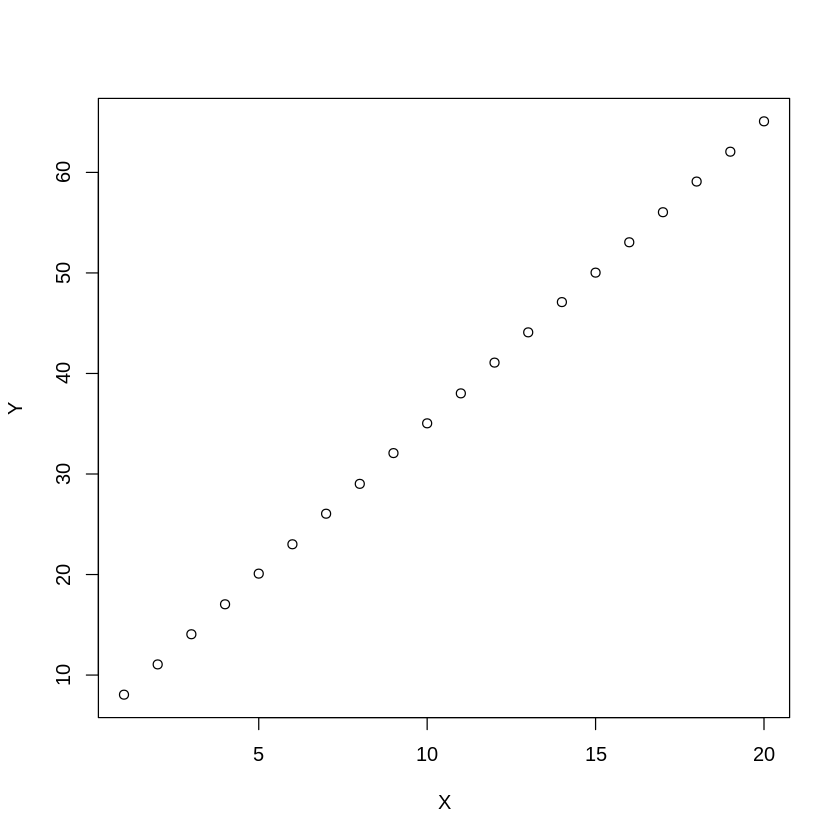

In [9]:
plot(h$X,h$Y,xlab='X',ylab='Y') #now we can see a preliminary plot here as well, it looks pretty much like a line really 

## Now we're going to do the linear regression in itself

First, we need to create and save the model for regression and fitting. The function to do this is $lm$, where we will indicate the type of model. In this case, we of course choose a linear model. 

In [10]:
linear_model <- lm(data=h,formula = Y ~ X)

To see how the model ends up being, we will see which are the coefficients and compute some summary statistics as well, provided by the model. Nothing about this is explained in class so far, but it is clear for me that this is a clearly good fit. 

In [11]:
print("Coeficientes:")
print(linear_model$coefficients)

[1] "Coeficientes:"
(Intercept)           X 
   5.045632    3.001083 


In [12]:
summary(linear_model)


Call:
lm(formula = Y ~ X, data = h)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.042128 -0.018353  0.000038  0.022188  0.039211 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.045632   0.012310   409.9   <2e-16 ***
X           3.001083   0.001028  2920.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0265 on 18 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 8.529e+06 on 1 and 18 DF,  p-value: < 2.2e-16


Now, we will plot the corresponding line along with the data used for fitting. 

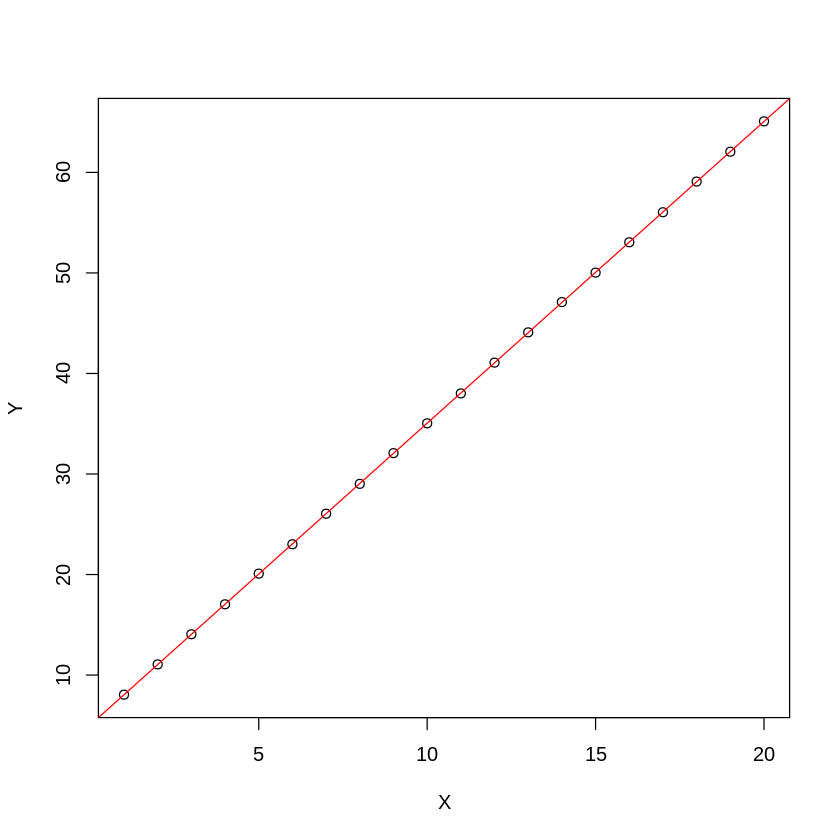

In [19]:
plot(h$X,h$Y,xlab="X",ylab="Y")
abline(linear_model,col='red')

## Another regression: Logistic Regression

Now we will do another example for logistic regression, again we will load and explore data before. As we have done it many times before, I won't dwell on these steps again. Summing up, this datasets has:
- 201 observations
- 3 variables per observation: Xi, Yi and Ci
- Xi and Yi are numeric with the ranges and statistics below
- Ci is categorical with two possible values A and B. The first one has 116 observations while the second one has 85. 

In [22]:
h <- read.csv('regresionlogistica.csv',sep=';')

In [23]:
head(h)

,Xi,Yi,Ci
,<dbl>,<dbl>,<chr>
1,-10.0,7.19509e-13,B
2,-9.9,9.24364e-13,B
3,-9.8,1.28391e-12,B
4,-9.7,1.64530e-12,B
5,-9.6,2.37242e-12,B
6,-9.5,3.02057e-12,B


In [24]:
summary(h)

       Xi            Yi                 Ci           
 Min.   :-10   Min.   :0.0000000   Length:201        
 1st Qu.: -5   1st Qu.:0.0000022   Class :character  
 Median :  0   Median :0.8748729   Mode  :character  
 Mean   :  0   Mean   :0.5344518                     
 3rd Qu.:  5   3rd Qu.:1.0025866                     
 Max.   : 10   Max.   :1.0498377                     

In [34]:
str(h)

'data.frame':	201 obs. of  3 variables:
 $ Xi: num  -10 -9.9 -9.8 -9.7 -9.6 -9.5 -9.4 -9.3 -9.2 -9.1 ...
 $ Yi: num  7.20e-13 9.24e-13 1.28e-12 1.65e-12 2.37e-12 ...
 $ Ci: chr  "B" "B" "B" "B" ...


In [39]:
table(h$Ci)


  A   B 
116  85 

Let us then prepare the data for the logistic regression. We have to replace strings of categories for numbers. Meaning, we will assign a number to A and a number to B. In this case, we arbitrarely decide on A = 1 and B = 0. 

In [41]:
h$Ci <- ifelse(h$Ci == 'A',1,0)

Let's check if our changed sticked. They did. 

In [42]:
head(h)

,Xi,Yi,Ci
,<dbl>,<dbl>,<dbl>
1,-10.0,7.19509e-13,0
2,-9.9,9.24364e-13,0
3,-9.8,1.28391e-12,0
4,-9.7,1.64530e-12,0
5,-9.6,2.37242e-12,0
6,-9.5,3.02057e-12,0


Now we will generate the logistic regression model, using the function $glm$. This is all we can do so far. In a real world application, we would have to divide into testing and training data and make predictions. For now, we have only commented the corresponding code, supposing we have an $h2$ dataframe of similar data. In that case, we will have a prediction for $h2$. However, they won't have the same categorical form, but will be a number between 0 and 1. Therefore, we will put a threshold to determine if they correspond to A(0) or B(1), depending on the problem.

In [44]:
logistic_model <- glm(data=h,formula = Ci ~ Xi + Yi, family='gaussian')

In [ ]:
# p <- predict(logistic_model,newdata=h2)